# Regression Case Study

**PROBLEM STATEMENT** 
There is a huge demand of used cars in the Indian Market today. As sale of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**Read the data**

In [2]:
cars=pd.read_csv('Cars.csv')

**Check the Head**

In [3]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [4]:
#cars =cars[cars['Year'] >= 2000] - remove older data if resale of vehicles of tht year not allowed anymore

**Get the info**

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


**Get the Summary Statistics**

In [6]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5961,212,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5950,11,Mumbai,781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5959,NaN,NaN,NaN,2013.39,3.24305,1998,2011.5,2014,2016,2019
Kilometers_Driven,5953,NaN,NaN,NaN,58711.1,91712.2,171,33931,53000,73000,6.5e+06
Fuel_Type,5961,5,Diesel,3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5934,2,Manual,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5946,4,First,4875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5959,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5944,143,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5929,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for Null Values**

In [7]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

**% Null values**

In [8]:
cars.isnull().sum()/cars.index.size*100

Name                  0.000000
Location              0.184533
Year                  0.033551
Kilometers_Driven     0.134206
Fuel_Type             0.000000
Transmission          0.452944
Owner_Type            0.251636
Mileage               0.033551
Engine                0.285187
Power                 0.536823
Colour                0.184533
Seats                 0.083879
No. of Doors          0.016776
New_Price            86.176816
Price                 0.000000
dtype: float64

In [9]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.208808
Year                  0.037965
Kilometers_Driven     0.151860
Fuel_Type             0.000000
Transmission          0.512528
Owner_Type            0.284738
Mileage               0.037965
Engine                0.322703
Power                 0.607441
Colour                0.208808
Seats                 0.094913
No. of Doors          0.018983
New_Price            97.513288
Price                 0.000000
dtype: float64

**Since New_Price has over 86% Null values, we would drop this column for now**

In [10]:
cars=cars.drop('New_Price',axis=1)

In [11]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Check for Duplicates**

In [12]:
cars.duplicated().sum()

2

In [13]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [14]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


- It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype

In [15]:
cars['Mileage'] = cars['Mileage'].str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [16]:
cars['Engine'] = cars['Engine'].str.replace('CC','').astype('float')

In [17]:
cars['Power'] = cars['Power'].replace('null bhp', np.nan)

In [18]:
cars['Power'] = cars['Power'].str.replace('bhp','').astype('float')

In [19]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Create a new column 'Brand' which has the brand name of the Cars**

In [20]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [21]:
cars.Brand.value_counts()

Maruti           1187
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Lamborghini         1
Isuzu               1
Bentley             1
Name: Brand, dtype: int64

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [22]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

**Create a new column 'Model' which has the Model name of the Cars**

In [23]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [24]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                     3
1000                  1
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               106
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia           

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format.

In [25]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

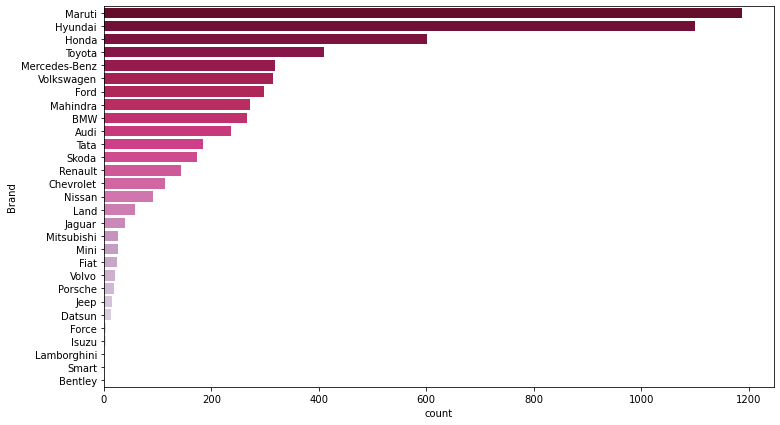

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),palette='PuRd_r', order = cars.Brand.value_counts().index);

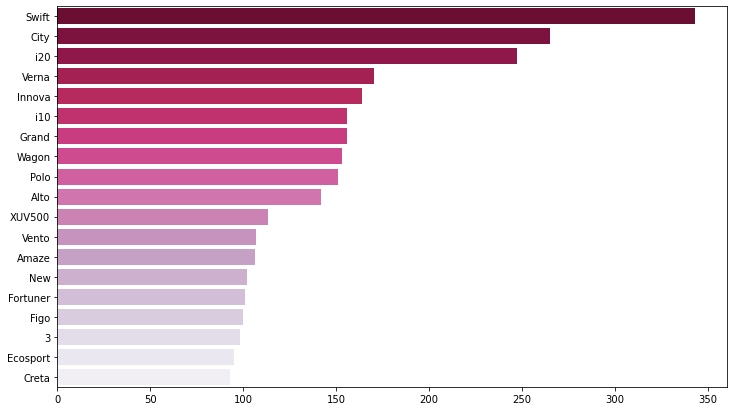

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(y=cars.Model.value_counts()[cars.Model.value_counts()>90].index,
            x=cars.Model.value_counts()[cars.Model.value_counts()>90].values,palette='PuRd_r');

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [28]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.0,86000.0,Diesel,Automatic,First,14.84,2143.0,170.0,White,5.0,4.0,19.0,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.0,116000.0,Diesel,Manual,Second,15.80,2148.0,170.0,White,5.0,4.0,8.5,Mercedes-Benz,New


In [29]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.0,Others,5.0,4.0,26.5,BMW,3
35,BMW 3,Chennai,2009.0,137000.0,Diesel,Automatic,Second,13.20,1995.0,170.0,Others,5.0,4.0,9.0,BMW,3


**Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [30]:
cars.Price.describe()

count    5959.000000
mean        9.529916
std        11.215743
min         0.440000
25%         3.500000
50%         5.660000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [31]:
#Binning the Car Companies based on avg prices of each car Company.
#cars['Price'] = cars['Price']
cars_2 = cars.copy()
price_by_brand = cars_2.groupby(['Brand'])['Price'].median().sort_values(ascending = False)
price_by_brand

Brand
Lamborghini      120.000
Bentley           59.000
Porsche           47.020
Land              35.000
Jaguar            31.900
Mini              24.285
Mercedes-Benz     24.000
Audi              23.500
BMW               21.000
Jeep              18.500
Volvo             18.250
Isuzu             16.090
Toyota            10.760
Mitsubishi         9.950
Force              8.000
Mahindra           7.570
Skoda              6.000
Renault            5.400
Ford               5.345
Honda              4.950
Volkswagen         4.890
Hyundai            4.650
Nissan             4.300
Maruti             4.200
Datsun             3.100
Smart              3.000
Tata               2.900
Fiat               2.600
Chevrolet          2.480
Name: Price, dtype: float64

In [32]:
cars_2 = cars_2.merge(price_by_brand, how='left',on='Brand')
cars_2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price_x,Brand,Model,Price_y
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6.00,Mahindra,Scorpio,7.57
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8.32,Maruti,Baleno,4.20
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4.00,Mahindra,Xylo,7.57
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3.49,Hyundai,Grand,4.65
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6.40,Toyota,Innova,10.76


In [33]:
#cars_2.to_csv('cars_2.csv')

In [34]:
bins = [0,10,20,160]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_Category'] = pd.cut(cars['Price'],bins ,right=True,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6.00,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8.32,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4.00,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3.49,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6.40,Toyota,Innova,Budget_Friendly


In [35]:
#cars.to_csv("cars_mod.csv")

In [36]:
cars[cars.Price == 160]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
4106,Land Rover Range,Hyderabad,2017.0,25000.0,Diesel,Automatic,First,13.33,2993.0,255.0,White,5.0,4.0,160.0,Land,Rover Range,TopNotch_Cars


In [37]:
cars.Cars_Category.value_counts()

Budget_Friendly    4481
Medium_Range        791
TopNotch_Cars       687
Name: Cars_Category, dtype: int64

In [38]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand          Cars_Category  
Audi           TopNotch_Cars       150
               Medium_Range         71
               Budget_Friendly      15
BMW            TopNotch_Cars       139
               Medium_Range        101
               Budget_Friendly      27
Bentley        TopNotch_Cars         1
Chevrolet      Budget_Friendly     113
Datsun         Budget_Friendly      13
Fiat           Budget_Friendly      25
Force          Budget_Friendly       2
               Medium_Range          1
Ford           Budget_Friendly     269
               TopNotch_Cars        23
               Medium_Range          6
Honda          Budget_Friendly     568
               Medium_Range         33
Hyundai        Budget_Friendly     991
               Medium_Range        104
               TopNotch_Cars         5
Isuzu          Medium_Range          2
               Budget_Friendly       1
Jaguar         TopNotch_Cars        37
               Medium_Range          3
Jeep           Medium_Range      

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

In [39]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [40]:
cars.CarAge.value_counts().sort_index(ascending=True)

2.0     101
3.0     298
4.0     586
5.0     739
6.0     736
7.0     793
8.0     642
9.0     573
10.0    461
11.0    338
12.0    196
13.0    170
14.0    122
15.0     75
16.0     55
17.0     28
18.0     13
19.0     14
20.0      7
21.0      4
22.0      2
23.0      4
Name: CarAge, dtype: int64

**Check for Outliers**

Shape before Outliers Treatment (5959, 18)


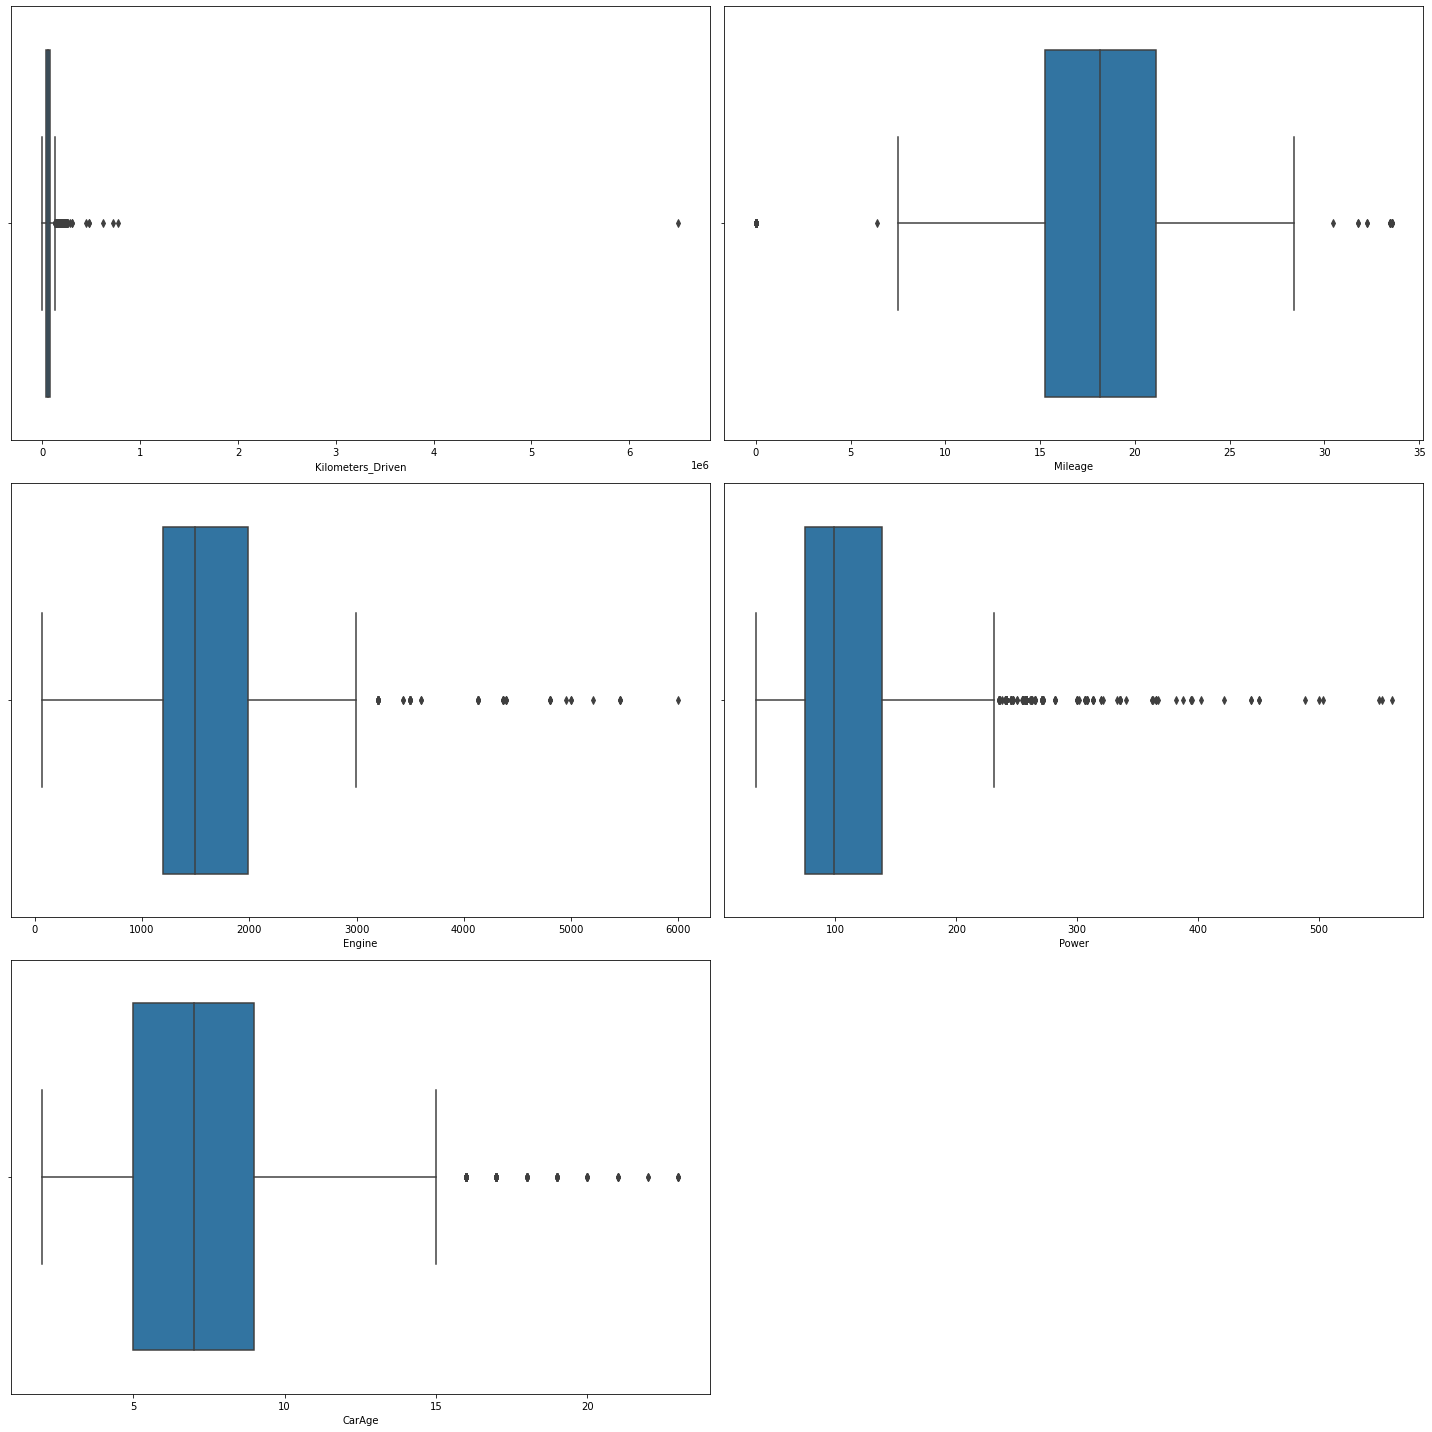

In [41]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

**Seems like Kilometers_Driven, Power, Engine have many outliers**

**Outliers Treatment**

In [42]:
Q1 = cars.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [43]:
lower_range

Year                  2006.00
Kilometers_Driven   -24586.25
Mileage                  6.50
Engine                  19.00
Power                  -19.65
Seats                    5.00
No. of Doors             4.00
Price                   -6.25
CarAge                  -1.00
dtype: float64

In [44]:
upper_range

Year                   2022.00
Kilometers_Driven    131551.75
Mileage                  29.86
Engine                 3163.00
Power                   232.75
Seats                     5.00
No. of Doors              4.00
Price                    19.75
CarAge                   15.00
dtype: float64

In [45]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131551.75,131551.75,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15,15,cars['CarAge'])

Shape After Outliers Treatment (5959, 18)


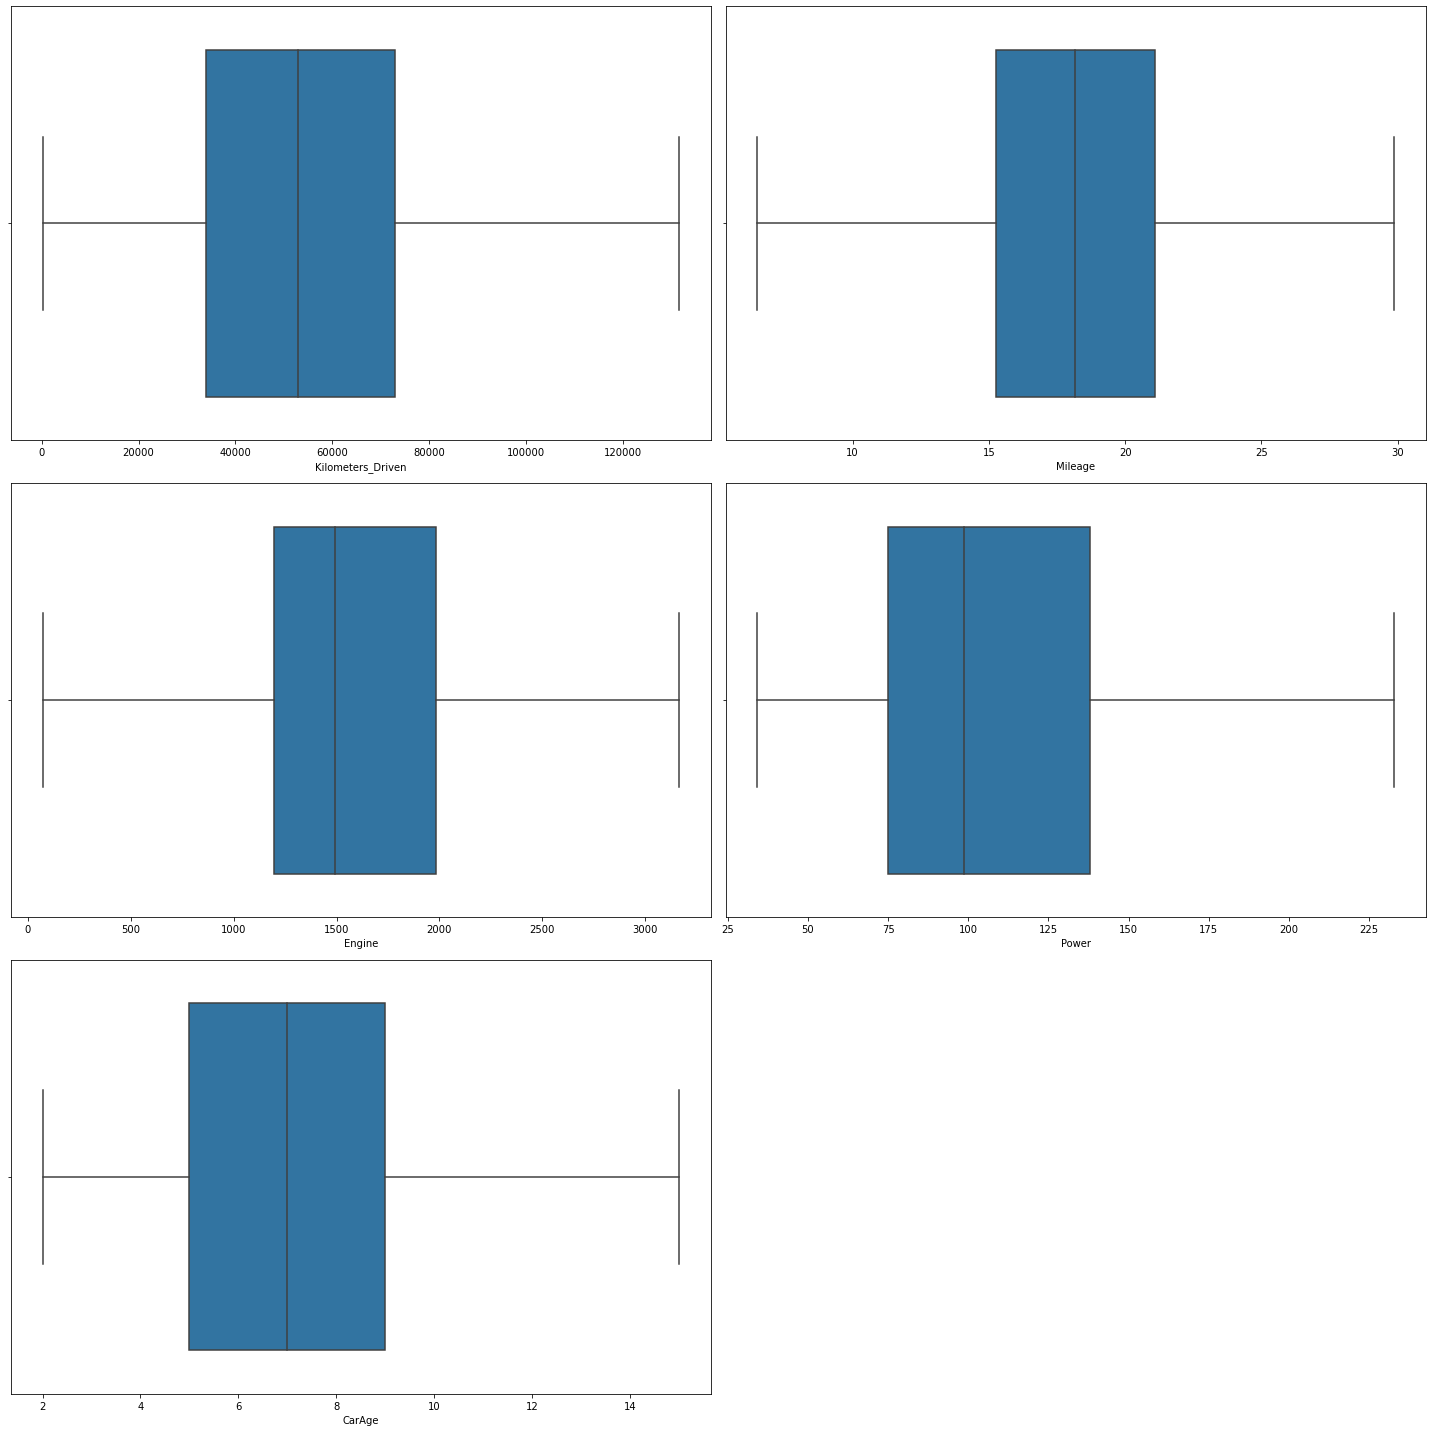

In [46]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [47]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [48]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'CarAge'],
      dtype='object')

In [49]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [50]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cars[non_objects])#.iloc[:,:])

In [51]:
cars[non_objects]=imputer.transform(cars[non_objects])

**Impute the Object values using Mode**

In [52]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects])#.iloc[:,:])

In [53]:
cars[objects]=imputer.transform(cars[objects])

In [54]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**There are no Null values now**

**Correlation Plot**

<AxesSubplot:>

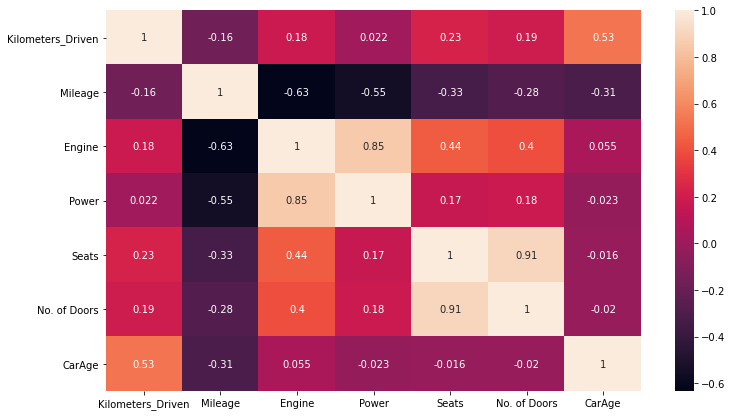

In [55]:
X=cars.drop(['Price','Name','Year'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.corr(),annot=True)

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

**Encode the Data**

In [56]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver,Mahindra,Scorpio
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others,Maruti,Baleno
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White,Mahindra,Xylo
3,Hyundai Grand,Delhi,Diesel,Manual,First,White,Hyundai,Grand
4,Toyota Innova,Delhi,Diesel,Manual,First,Others,Toyota,Innova


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [57]:
cars.Owner_Type = cars.Owner_Type.replace({'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0})

In [58]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [59]:
cars.dtypes

Name                   int16
Location                int8
Year                 float64
Kilometers_Driven    float64
Fuel_Type               int8
Transmission            int8
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Colour                  int8
Seats                float64
No. of Doors         float64
Price                float64
Brand                   int8
Model                  int16
Cars_Category           int8
CarAge               float64
dtype: object

In [60]:
cars.Owner_Type.value_counts()

3    4888
2     953
1     110
0       8
Name: Owner_Type, dtype: int64

**Split the Data**

In [61]:
x=cars.drop(['Price','Name','Year'],axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=cars.Price

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [63]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [64]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          5.194196   5.108073        0.785221    0.793113
Decision Tree Regressor    0.019624   4.203868        0.999997    0.859875
Random Forest Regressor    1.143987   3.349651        0.989582    0.911035
ANN Regressor              2.182569   3.758459        0.962078    0.887995


**Looks Like ANN, DT, and RF are over-fitting, Let's Grid Search to get the best parameters**

**You can also visualise the tree and see where to prune it and decide the max_depth and other parameters**


**Grid Search on Decision Tree**

In [65]:
param_grid = {
    'max_depth': [10,15,20,25,30],# 3,5,7,9
    'min_samples_leaf': [3,15,30], # 1-3% TRAIN DATA
    'min_samples_split': [15,30,35,40,50],#3X min sample split
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 30}


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

**Using Grid Search for Random Forest**

In [66]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],#Sq root of the no. of ind features
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500] # Oob error rate
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [67]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [68]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [69]:
#best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

**Using Grid Search for ANN**

In [70]:
param_grid = {
    'hidden_layer_sizes':[500,(100,100)], #Nobs_train/a(Nvar)
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [71]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [72]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


In [73]:
#best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}

In [74]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          5.194196   5.108073        0.785221    0.793113
Decision Tree Regressor    3.266113   4.123359        0.915079    0.865190
Random Forest Regressor    3.070783   3.644357        0.924932    0.894692
ANN Regressor              2.624487   3.759301        0.945167    0.887945


In [75]:
rfr.feature_importances_

array([2.35282587e-03, 2.99030590e-02, 3.35556329e-03, 4.89251857e-02,
       5.58992753e-04, 1.18979196e-02, 1.08933090e-01, 2.32384066e-01,
       3.37176567e-04, 3.38629598e-03, 1.61361529e-03, 2.06811626e-02,
       8.70783746e-03, 4.69767761e-01, 5.71954496e-02])

In [76]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                        Imp
Cars_Category      0.469768
Power              0.232384
Engine             0.108933
CarAge             0.057195
Transmission       0.048925
Kilometers_Driven  0.029903
Brand              0.020681
Mileage            0.011898
Model              0.008708
Seats              0.003386
Fuel_Type          0.003356
Location           0.002353
No. of Doors       0.001614
Owner_Type         0.000559
Colour             0.000337
